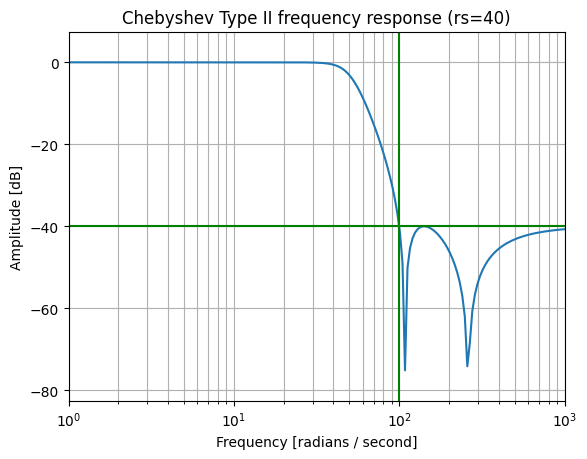

In [3]:
#1. Analog filter design example - Analog works with Omega while digital with nrmalized frequency
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

b, a = signal.cheby2(4, 40, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response (rs=40)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rs
plt.show()

SOS= [[ 0.07074651 -0.10084414  0.07074651  1.         -1.41103887  0.51483494]
 [ 1.         -1.92343832  1.          1.         -1.74246541  0.79055172]
 [ 1.         -1.96939069  1.          1.         -1.88177822  0.90671793]
 [ 1.         -1.98192063  1.          1.         -1.93788408  0.95393456]
 [ 1.         -1.98665245  1.          1.         -1.9655417   0.9778299 ]
 [ 1.         -1.98840459  1.          1.         -1.98246171  0.99331883]]


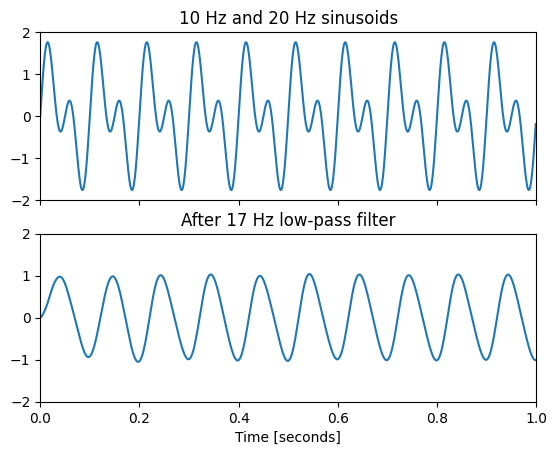

In [4]:
# 2. Digital filter design
# 2.1/ Generate a signal made up of 10 Hz and 20 Hz, sampled at 1 kHz
#
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])
#
# 2.2.Design a digital high-pass filter at 17 Hz to remove the 10 Hz tone, and apply it to the signal. 
# (It’s recommended to use second-order sections format when filtering, to avoid numerical error 
# with transfer function (ba) format):
#
sos = signal.cheby2(12, 20, 17, 'lp', fs=1000, output='sos')
print ("SOS=",sos)
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 17 Hz low-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.show()



b= [  0.07074651  -0.79768363   4.16316454 -13.30967973  29.05059195
 -45.63066659  52.90705389 -45.63066659  29.05059195 -13.30967973
   4.16316454  -0.79768363   0.07074651]   a= [ 1.00000000e+00 -1.09211700e+01  5.47145604e+01 -1.66275887e+02
  3.41374457e+02 -4.98814136e+02  5.31913231e+02 -4.17078872e+02
  2.38668812e+02 -9.72057044e+01  2.67476046e+01 -4.46482919e+00
  3.41933046e-01]


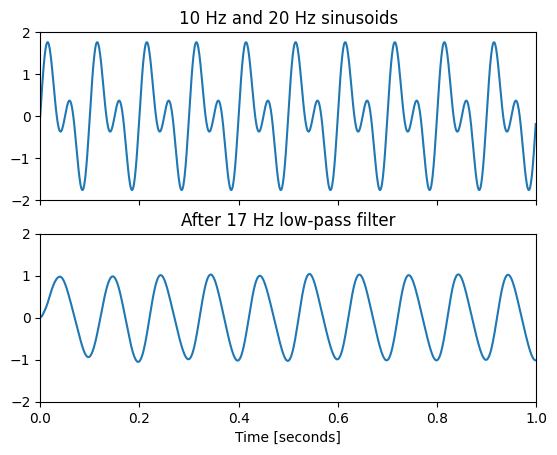

In [5]:
#
# 2.3. The same digital filter with a,b coeffiefint insted of sos
#
b,a = signal.cheby2(12, 20, 17, 'lp', fs=1000) #, output='sos')
print ("b=",b,"  a=",a)
filtered = signal.lfilter(b,a, sig)
#plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])
ax2.plot(t, filtered)
ax2.set_title('After 17 Hz low-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.show()

b= [ 0.03114009 -0.06009323  0.03114009]  a= [ 1.         -1.93379994  0.93598688]


Text(0.5, 0, 'Time [seconds]')

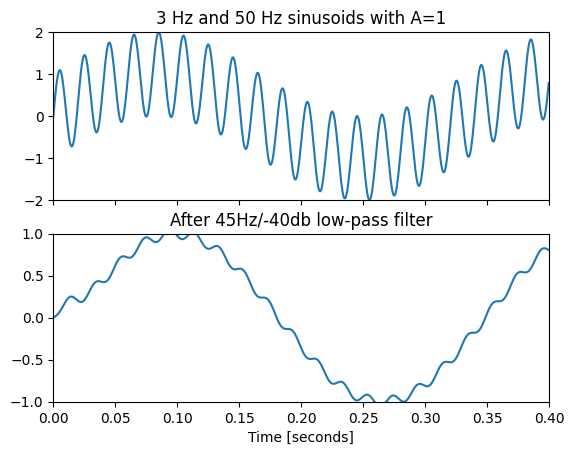

In [16]:
# 3. Design digital low poass filter

t = np.linspace(0, .4, 800, False)  # T = .4 seconds  Fs=2KHz ->800points
# create combined signal from 5 and 50Hz 
sig = np.sin(2*np.pi*3*t) + np.sin(2*np.pi*50*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('3 Hz and 50 Hz sinusoids with A=1')
ax1.axis([0, .4, -2, 2])
# design filter
b,a = signal.cheby2(2, 30, 60, 'lp', fs=2000)
print ('b=',b,' a=',a)
filtered = signal.lfilter(b,a, sig)

#plot filtered
ax2.plot(t, filtered)
ax2.set_title('After 45Hz/-40db low-pass filter')
ax2.axis([0, .4, -1, 1])
ax2.set_xlabel('Time [seconds]')
# plt.show()


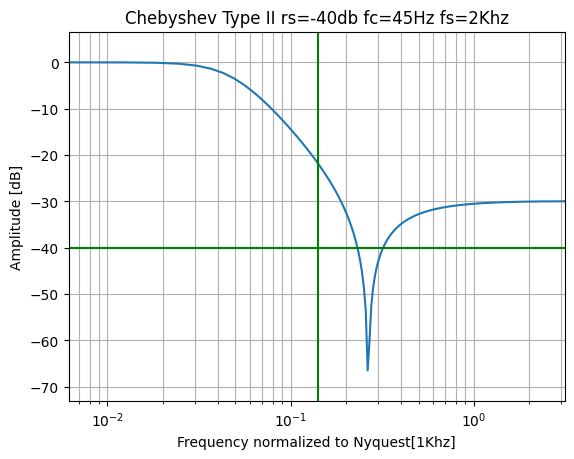

In [17]:
# 3.2. creade the bode plot
w, h = signal.freqz(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II rs=-40db fc=45Hz fs=2Khz')
plt.xlabel('Frequency normalized to Nyquest[1Khz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(3.14*45/1000, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rs
plt.show()

In [8]:
print (a[0])

1.0
